In [2]:
# Term Project: TorontoRobbery - Data Analysis¶
# For this term project, we will analyze the open dataset of toronto robbery provided by Toronto City(http://data.torontopolice.on.ca/datasets/281a5ad35c60458cb7de41c5ae99d5b5_0.) .

# We are going to read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question:

# RESPONSE:

# Which police divisions respond to the most robberies?
# How long do people wait to report a robbery (e.g. reported date vs. occuring date)?
# Which robbery types are reported the most quickly? Least quickly?


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# ---------------------------------------------------------------------------------------------------------------------------
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import folium

In [4]:
Robbery_df = pd.read_csv('Data/robbery_data.csv',
                          index_col = "Record_ID")

neighbourhood_df = pd.read_csv('Data/neighbourhood.csv',
                          index_col = "Neighbourhood_ID")

offence_df = pd.read_csv('Data/offences.csv',
                          index_col = "Offence_ID")

neighbourhood_df = pd.read_csv('Data/neighbourhood.csv',
                          index_col = "Neighbourhood_ID")

premises_df =  pd.read_csv('Data/premise_types.csv',
                          index_col = "Premise_Type_ID")

daytime_df = pd.read_csv('Data/time_of_day.csv',
                          index_col = "Time_Of_Day_ID")


In [5]:
Robbery_df.dtypes

Occurrence_DateTime               object
Reported_DateTime                 object
Reported_After_Occurence_WEEKS     int64
Reported_After_Occurence_DAYS      int64
Reported_After_Occurence_HOURS     int64
Occurence_Date                    object
Occurred_Time_Of_Day_ID            int64
Reported_Date                     object
Reported_Time_Of_Day_ID            int64
Neighbourhood_ID                   int64
Offence_ID                         int64
Premise_Type_ID                    int64
Occurrence_Postal_Code            object
Occurrence_FSA                    object
Division                          object
dtype: object

In [6]:
# set Division as index
# --------------------------------------------------------------------------------------------------------------------------
Robbery_df.set_index('Division')

,Occurrence_DateTime,Reported_DateTime,Reported_After_Occurence_WEEKS,Reported_After_Occurence_DAYS,Reported_After_Occurence_HOURS,Occurence_Date,Occurred_Time_Of_Day_ID,Reported_Date,Reported_Time_Of_Day_ID,Neighbourhood_ID,Offence_ID,Premise_Type_ID,Occurrence_Postal_Code,Occurrence_FSA
Division,,,,,,,,,,,,,,
D41,00:00.0,00:00.0,0,2,32,12/31/2013,12,1/2/2014,4,119,200,5,M1R5B3,M1R
D51,00:00.0,53:00.0,0,0,22,1/1/2014,3,1/1/2014,14,75,210,5,M4Y1C3,M4Y
D14,08:00.0,54:00.0,0,0,4,1/1/2014,4,1/1/2014,6,78,100,1,M5V2B7,M5V
D12,16:00.0,16:00.0,0,0,0,1/1/2014,14,1/1/2014,14,113,150,2,M9N3P1,M9N
D41,20:00.0,53:00.0,0,0,0,1/2/2014,10,1/2/2014,10,120,100,1,M1L2J8,M1L
D42,00:00.0,46:00.0,0,0,0,1/2/2014,19,1/2/2014,19,132,180,1,M1B4Z3,M1B
D33,04:00.0,24:00.0,0,0,0,1/2/2014,20,1/2/2014,20,47,150,1,M2J1L9,M2J
D43,56:00.0,56:00.0,0,0,0,1/3/2014,9,1/3/2014,9,131,110,5,M1C2L5,M1C
D22,30:00.0,15:00.0,0,0,4,1/3/2014,14,1/3/2014,16,14,210,5,M9A1B9,M9A


In [7]:
print("Numer of Missing values in Robbery_df : ", Robbery_df.isnull().sum().sum())

Numer of Missing values in Robbery_df :  0


In [8]:
# 1. What type of Division Responded most ? Least Responded?

In [9]:
Division_count = Robbery_df['Division'].value_counts()
Division_count

D51    1774
D43    1572
D41    1428
D23    1422
D31    1402
D42    1242
D14    1173
D32    1019
D12     997
D52     930
D22     885
D11     788
D55     781
D54     730
D13     682
D33     645
D53     607
Name: Division, dtype: int64

In [10]:
# What type of Division Responded most ? Least common?
# -year by year comparison
# -2018 - 2014 comparison

In [11]:
# Create Occurance_Year colunm to facilate analysis per year
# ---------------------------------------------------------------------------------------------------------------------------
Robbery_df['Occurence_Date'] = pd.to_datetime(Robbery_df['Occurence_Date'])
Robbery_df['Occurance_Year'] = Robbery_df['Occurence_Date'].dt.year

In [12]:
Robbery_df.head()

,Occurrence_DateTime,Reported_DateTime,Reported_After_Occurence_WEEKS,Reported_After_Occurence_DAYS,Reported_After_Occurence_HOURS,Occurence_Date,Occurred_Time_Of_Day_ID,Reported_Date,Reported_Time_Of_Day_ID,Neighbourhood_ID,Offence_ID,Premise_Type_ID,Occurrence_Postal_Code,Occurrence_FSA,Division,Occurance_Year
Record_ID,,,,,,,,,,,,,,,,
33713,00:00.0,00:00.0,0,2,32,2013-12-31,12,1/2/2014,4,119,200,5,M1R5B3,M1R,D41,2013
234,00:00.0,53:00.0,0,0,22,2014-01-01,3,1/1/2014,14,75,210,5,M4Y1C3,M4Y,D51,2014
32743,08:00.0,54:00.0,0,0,4,2014-01-01,4,1/1/2014,6,78,100,1,M5V2B7,M5V,D14,2014
33139,16:00.0,16:00.0,0,0,0,2014-01-01,14,1/1/2014,14,113,150,2,M9N3P1,M9N,D12,2014
33089,20:00.0,53:00.0,0,0,0,2014-01-02,10,1/2/2014,10,120,100,1,M1L2J8,M1L,D41,2014


In [13]:
# Group by Occurance_Year
# ---------------------------------------------------------------------------------------------------------------------------
Division_per_year = Robbery_df.groupby(by='Occurance_Year')['Division'].value_counts()
Division_per_year

Occurance_Year  Division
2013            D41           1
2014            D41         343
                D43         342
                D51         323
                D14         281
                D23         261
                D31         261
                D42         247
                D12         219
                D32         174
                D22         167
                D54         167
                D52         163
                D55         145
                D11         139
                D13         138
                D33         120
                D53          94
2015            D43         339
                D51         329
                D41         311
                D31         287
                D23         280
                D42         262
                D14         193
                D12         184
                D11         180
                D22         166
                D55         161
                D52         146
               

In [14]:
# Division Responce to Offence during the year 2018 Equal to 3522 over all divisions
# --------------------------------------------------------------------------------------------------------------------------
Robbery_df_2018 = Robbery_df.loc[Robbery_df['Occurance_Year'] == 2018]
Robbery_df_2018.count()

Occurrence_DateTime               3522
Reported_DateTime                 3522
Reported_After_Occurence_WEEKS    3522
Reported_After_Occurence_DAYS     3522
Reported_After_Occurence_HOURS    3522
Occurence_Date                    3522
Occurred_Time_Of_Day_ID           3522
Reported_Date                     3522
Reported_Time_Of_Day_ID           3522
Neighbourhood_ID                  3522
Offence_ID                        3522
Premise_Type_ID                   3522
Occurrence_Postal_Code            3522
Occurrence_FSA                    3522
Division                          3522
Occurance_Year                    3522
dtype: int64

In [15]:
# Division Responce to Offence during the year 2018
# Note Division 51 has responded to most Robberies by count of 448 while D33 has responded the minimum by 122
# ---------------------------------------------------------------------------------------------------------------------------
Division_Responce_2018_df = pd.DataFrame(Robbery_df_2018.groupby(by='Division')['Offence_ID'].value_counts())
Division_Responce_2018_df

Offence_ID
Division Offence_ID            
D11      200                 40
         210                 34
         180                 16
         100                 14
         220                 14
         110                  7
         130                  5
         140                  3
         150                  3
D12      200                 40
         210                 34
         100                 31
         220                 29
         130                 11
         180                  9
         110                  4
         150                  4
         160                  2
         190                  1
D13      100                 27
         210                 27
         200                 21
         220                 19
         110                 15
         180                 12
         130                  9
         140                  6
         150                  4
         160                  2
         170                  1
...                         ...
D53      220                 25
         100                 20
         180                 13
         110                  6
         150                  4
         130                  3
         120                  2
         140                  1
D54      200                 37
         220                 24
         100                 23
         210                 17
         130                  7
         110                  6
         140                  5
         150                  5
         180                  4
         120                  1
         160                  1
D55      100                 32
         220                 30
         200                 28
         210                 27
         110                  6
         150                  4
         180                  4
         130                  3
         140                  1
         160                  1
         170                  1

[188 rows x 1 columns]

In [16]:
Robbery_df_2018 = pd.DataFrame(Robbery_df.loc[Robbery_df['Occurance_Year'] == 2018])

In [17]:
Robbery_df_2018.dtypes

Occurrence_DateTime                       object
Reported_DateTime                         object
Reported_After_Occurence_WEEKS             int64
Reported_After_Occurence_DAYS              int64
Reported_After_Occurence_HOURS             int64
Occurence_Date                    datetime64[ns]
Occurred_Time_Of_Day_ID                    int64
Reported_Date                             object
Reported_Time_Of_Day_ID                    int64
Neighbourhood_ID                           int64
Offence_ID                                 int64
Premise_Type_ID                            int64
Occurrence_Postal_Code                    object
Occurrence_FSA                            object
Division                                  object
Occurance_Year                             int64
dtype: object

In [18]:
# Plotting Division Responce to Offence during 2018
# --------------------------------------------------------------------------------------------------------------------------
Division_Responce_2018_df.info

<bound method DataFrame.info of                      Offence_ID
Division Offence_ID            
D11      200                 40
         210                 34
         180                 16
         100                 14
         220                 14
         110                  7
         130                  5
         140                  3
         150                  3
D12      200                 40
         210                 34
         100                 31
         220                 29
         130                 11
         180                  9
         110                  4
         150                  4
         160                  2
         190                  1
D13      100                 27
         210                 27
         200                 21
         220                 19
         110                 15
         180                 12
         130                  9
         140                  6
         150                  4
        

In [19]:
Division_Responce_2018_df.dtypes

Offence_ID    int64
dtype: object

In [20]:
#.set_index('Division_Responce_2018_df.Division')

In [21]:
Division_per_year = Robbery_df.groupby(by='Occurance_Year')['Division'].value_counts().max()
Division_per_year

448

In [22]:
Division_per_year = Robbery_df.groupby(by='Occurance_Year')['Division'].value_counts().min()
Division_per_year

1

In [23]:
# Divion 51 has responded to the Maximum no of offences during 2018
Division_51 = Robbery_df_2018.loc[Robbery_df_2018['Division'] == 'D51']
Division_51.head()


,Occurrence_DateTime,Reported_DateTime,Reported_After_Occurence_WEEKS,Reported_After_Occurence_DAYS,Reported_After_Occurence_HOURS,Occurence_Date,Occurred_Time_Of_Day_ID,Reported_Date,Reported_Time_Of_Day_ID,Neighbourhood_ID,Offence_ID,Premise_Type_ID,Occurrence_Postal_Code,Occurrence_FSA,Division,Occurance_Year
Record_ID,,,,,,,,,,,,,,,,
158164,00:00.0,41:00.0,0,0,0,2018-01-01,7,1/1/2018,7,73,200,1,M5A3Z8,M5A,D51,2018
153601,57:00.0,50:00.0,0,0,2,2018-01-02,5,1/2/2018,6,72,200,1,M5A4G8,M5A,D51,2018
76659,05:00.0,53:00.0,0,0,0,2018-01-04,2,1/4/2018,2,75,200,1,M4Y1Y4,M4Y,D51,2018
17348,40:00.0,49:00.0,0,0,0,2018-01-06,6,1/6/2018,6,74,210,5,M4Y2Y5,M4Y,D51,2018
91883,30:00.0,42:00.0,0,2,52,2018-01-07,8,1/9/2018,10,73,200,3,M5A2P1,M5A,D51,2018


In [24]:
Division_per_year = Robbery_df.groupby(by='Division')['Occurance_Year'].value_counts()
Division_per_year

Division  Occurance_Year
D11       2015              180
          2017              169
          2016              164
          2014              139
          2018              136
D12       2016              234
          2014              219
          2017              195
          2015              184
          2018              165
D13       2016              149
          2017              143
          2018              143
          2014              138
          2015              109
D14       2014              281
          2016              241
          2018              240
          2017              218
          2015              193
D22       2017              209
          2016              174
          2018              169
          2014              167
          2015              166
D23       2016              344
          2017              304
          2015              280
          2014              261
          2018              233
               

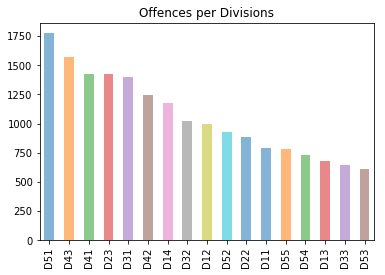

In [25]:
Robbery_df.Division.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Offences per Divisions");

In [26]:
Division_per_2018 = Robbery_df_2018.groupby(by='Division')['Occurance_Year'].value_counts()
Division_per_2018

Division  Occurance_Year
D11       2018              136
D12       2018              165
D13       2018              143
D14       2018              240
D22       2018              169
D23       2018              233
D31       2018              278
D32       2018              270
D33       2018              122
D41       2018              223
D42       2018              231
D43       2018              230
D51       2018              448
D52       2018              229
D53       2018              138
D54       2018              130
D55       2018              137
Name: Occurance_Year, dtype: int64

In [27]:
Robbery_df_2018.dtypes

Occurrence_DateTime                       object
Reported_DateTime                         object
Reported_After_Occurence_WEEKS             int64
Reported_After_Occurence_DAYS              int64
Reported_After_Occurence_HOURS             int64
Occurence_Date                    datetime64[ns]
Occurred_Time_Of_Day_ID                    int64
Reported_Date                             object
Reported_Time_Of_Day_ID                    int64
Neighbourhood_ID                           int64
Offence_ID                                 int64
Premise_Type_ID                            int64
Occurrence_Postal_Code                    object
Occurrence_FSA                            object
Division                                  object
Occurance_Year                             int64
dtype: object

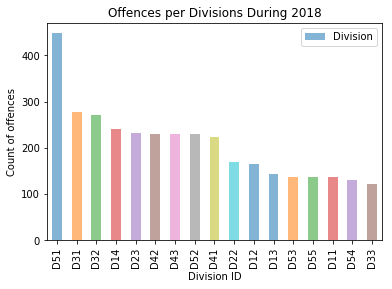

In [28]:
Robbery_df_2018.Division.value_counts().plot(x='Division', y='Offence_ID',kind='bar', alpha=0.55)
plt.title("Offences per Divisions During 2018");
plt.ylabel("Count of offences")
plt.xlabel("Division ID")
plt.legend()

In [29]:
# Offences grouped by Division versus offence crosstab for Robberies that took place during 2018
# ------------------------------------------------------------------------------------------------------------------------
table = pd.crosstab(index=[Robbery_df_2018.Offence_ID,Robbery_df_2018.Division], columns=[Robbery_df_2018.Occurance_Year])
table.unstack()

Occurance_Year  2018                                                        \
Division         D11   D12   D13   D14   D22   D23   D31   D32   D33   D41   
Offence_ID                                                                   
100             14.0  31.0  27.0  47.0  20.0  53.0  33.0  64.0  31.0  40.0   
110              7.0   4.0  15.0  10.0  12.0   8.0   5.0   6.0   2.0   6.0   
120              NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
130              5.0  11.0   9.0   4.0   4.0   6.0   9.0   7.0   9.0  13.0   
140              3.0   NaN   6.0   1.0   4.0   7.0  15.0   6.0   2.0   3.0   
150              3.0   4.0   4.0  13.0   6.0   6.0  20.0  10.0   6.0   7.0   
160              NaN   2.0   2.0   6.0   2.0   7.0   7.0   NaN   3.0   2.0   
170              NaN   NaN   1.0   2.0   4.0   5.0   6.0   4.0   6.0   2.0   
180             16.0   9.0  12.0  12.0  13.0  12.0  58.0  46.0   9.0  15.0   
190              NaN   1.0   NaN   4.0   1.0   3.0   3.0   NaN   NaN   NaN   
200             40.0  40.0  21.0  71.0  48.0  53.0  74.0  70.0  36.0  61.0   
210             34.0  34.0  27.0  34.0  38.0  28.0  23.0  34.0   5.0  26.0   
220             14.0  29.0  19.0  36.0  17.0  45.0  25.0  22.0  13.0  48.0   

Occurance_Year                                             
Division         D42   D43    D51   D52   D53   D54   D55  
Offence_ID                                                 
100             37.0  48.0   53.0  26.0  20.0  23.0  32.0  
110              7.0   8.0    7.0  10.0   6.0   6.0   6.0  
120              NaN   NaN    NaN   NaN   2.0   1.0   NaN  
130             15.0   3.0    7.0  15.0   3.0   7.0   3.0  
140              3.0   4.0    6.0   2.0   1.0   5.0   1.0  
150              9.0  11.0   16.0   6.0   4.0   5.0   4.0  
160              NaN   4.0    4.0   3.0   NaN   1.0   1.0  
170              6.0   4.0    1.0   1.0   NaN   NaN   1.0  
180             10.0  15.0   19.0  18.0  13.0   4.0   4.0  
190              NaN   NaN    2.0   4.0   NaN   NaN   NaN  
200             93.0  56.0  181.0  61.0  38.0  37.0  28.0  
210             25.0  28.0   63.0  38.0  26.0  17.0  27.0  
220             26.0  49.0   89.0  45.0  25.0  24.0  30.0

In [30]:
# Offences grouped by Division versus offence crosstab for Robberies that took place during 2018
# ------------------------------------------------------------------------------------------------------------------------
table = pd.crosstab(index=[Robbery_df_2018.Division,Robbery_df_2018.Offence_ID], columns=[Robbery_df_2018.Occurance_Year])
table.unstack()

Occurance_Year  2018                                                           \
Offence_ID       100   110  120   130   140   150  160  170   180  190    200   
Division                                                                        
D11             14.0   7.0  NaN   5.0   3.0   3.0  NaN  NaN  16.0  NaN   40.0   
D12             31.0   4.0  NaN  11.0   NaN   4.0  2.0  NaN   9.0  1.0   40.0   
D13             27.0  15.0  NaN   9.0   6.0   4.0  2.0  1.0  12.0  NaN   21.0   
D14             47.0  10.0  NaN   4.0   1.0  13.0  6.0  2.0  12.0  4.0   71.0   
D22             20.0  12.0  NaN   4.0   4.0   6.0  2.0  4.0  13.0  1.0   48.0   
D23             53.0   8.0  NaN   6.0   7.0   6.0  7.0  5.0  12.0  3.0   53.0   
D31             33.0   5.0  NaN   9.0  15.0  20.0  7.0  6.0  58.0  3.0   74.0   
D32             64.0   6.0  1.0   7.0   6.0  10.0  NaN  4.0  46.0  NaN   70.0   
D33             31.0   2.0  NaN   9.0   2.0   6.0  3.0  6.0   9.0  NaN   36.0   
D41             40.0   6.0  NaN  13.0   3.0   7.0  2.0  2.0  15.0  NaN   61.0   
D42             37.0   7.0  NaN  15.0   3.0   9.0  NaN  6.0  10.0  NaN   93.0   
D43             48.0   8.0  NaN   3.0   4.0  11.0  4.0  4.0  15.0  NaN   56.0   
D51             53.0   7.0  NaN   7.0   6.0  16.0  4.0  1.0  19.0  2.0  181.0   
D52             26.0  10.0  NaN  15.0   2.0   6.0  3.0  1.0  18.0  4.0   61.0   
D53             20.0   6.0  2.0   3.0   1.0   4.0  NaN  NaN  13.0  NaN   38.0   
D54             23.0   6.0  1.0   7.0   5.0   5.0  1.0  NaN   4.0  NaN   37.0   
D55             32.0   6.0  NaN   3.0   1.0   4.0  1.0  1.0   4.0  NaN   28.0   

Occurance_Year              
Offence_ID       210   220  
Division                    
D11             34.0  14.0  
D12             34.0  29.0  
D13             27.0  19.0  
D14             34.0  36.0  
D22             38.0  17.0  
D23             28.0  45.0  
D31             23.0  25.0  
D32             34.0  22.0  
D33              5.0  13.0  
D41             26.0  48.0  
D42             25.0  26.0  
D43             28.0  49.0  
D51             63.0  89.0  
D52             38.0  45.0  
D53             26.0  25.0  
D54             17.0  24.0  
D55             27.0  30.0

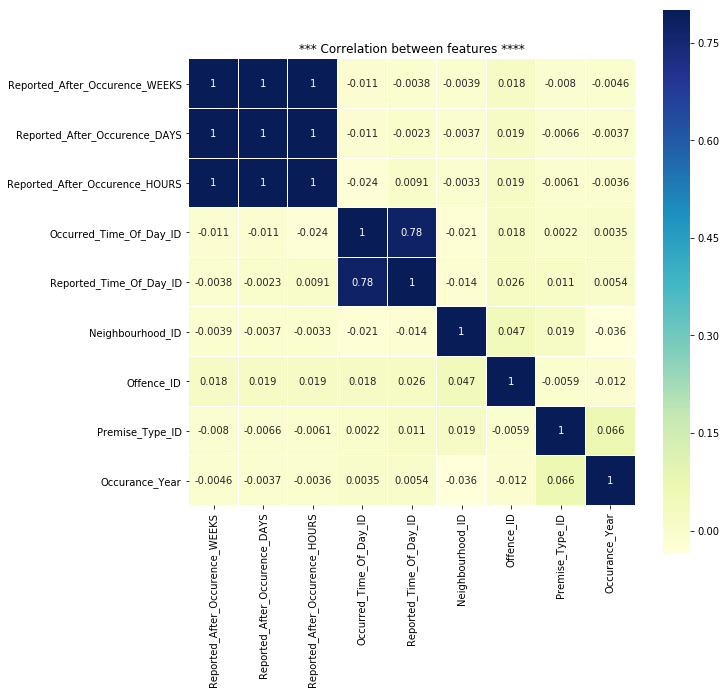

In [31]:
# Correlation between features in the Robbery Data frame
corr=Robbery_df.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('*** Correlation between features ****');


In [32]:
print("Numer of Offences values in Robbery_df : ", Robbery_df.Offence_ID.count()) 

Numer of Offences values in Robbery_df :  18077


In [33]:
#Robbery_Division=Robbery_df.groupby(['Offence_ID','Occurence_Date','Division'])
Robbery_df.groupby(['Division','Offence_ID','Neighbourhood_ID']).size().head(15) # Distribution of Offences Robbery Reported

Division  Offence_ID  Neighbourhood_ID
D11       100         83                  11
                      84                   1
                      85                   2
                      86                  15
                      87                  10
                      88                  14
                      89                  12
                      90                   9
                      91                   7
                      93                  18
                      111                  1
                      114                  1
          110         83                   2
                      84                   1
                      86                   4
dtype: int64

In [68]:
Robbery_df['Reported_After_Occurence_WEEKS'].head()

Record_ID
33713    0
234      0
32743    0
33139    0
33089    0
Name: Reported_After_Occurence_WEEKS, dtype: int64

In [69]:
Robbery_df['Reported_After_Occurence_WEEKS'].describe()

count    18077.000000
mean         0.123361
std          1.653299
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        129.000000
Name: Reported_After_Occurence_WEEKS, dtype: float64

In [70]:
Robbery_df['Reported_After_Occurence_HOURS'].describe()

count    18077.000000
mean        20.245505
std        276.984392
min        -22.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      21698.000000
Name: Reported_After_Occurence_HOURS, dtype: float64

In [71]:
total = Robbery_df.isnull().sum().sort_values(ascending=False)

In [72]:
 Robbery_df.Reported_After_Occurence_HOURS.sum()

365978

In [73]:
Robbery_df.Reported_After_Occurence_HOURS.count()

18077

In [52]:
Robbery_df.groupby(['Reported_After_Occurence_HOURS']).size().head(15) # Distribution of Hours Robbery Reported

Reported_After_Occurence_HOURS
-22      155
-20      116
-18       98
-16       53
-14       41
-12       23
-10       21
-8        16
-6        18
-4        18
-2        22
 0     10970
 2      2358
 4      1069
 6       548
dtype: int64

In [74]:
#pd.value_counts(Robbery_df['Neighbourhood','occurancedate'])[:15]
Robbery_occurance=pd.value_counts(Robbery_df['Occurence_Date'])
Robbery_occurance.head()

2017-10-31    37
2014-07-26    33
2014-10-17    31
2018-10-31    31
2014-10-31    30
Name: Occurence_Date, dtype: int64

In [75]:
Robbery_df.Occurence_Date.head()

Record_ID
33713   2013-12-31
234     2014-01-01
32743   2014-01-01
33139   2014-01-01
33089   2014-01-02
Name: Occurence_Date, dtype: datetime64[ns]

In [76]:
## df.groupby(['Divison']).mean()
Robbery_Division=Robbery_df.groupby(['Offence_ID','Occurence_Date','Division'])
Robbery_Division.head(10)

,Occurrence_DateTime,Reported_DateTime,Reported_After_Occurence_WEEKS,Reported_After_Occurence_DAYS,Reported_After_Occurence_HOURS,Occurence_Date,Occurred_Time_Of_Day_ID,Reported_Date,Reported_Time_Of_Day_ID,Neighbourhood_ID,Offence_ID,Premise_Type_ID,Occurrence_Postal_Code,Occurrence_FSA,Division,Occurance_Year
Record_ID,,,,,,,,,,,,,,,,
33713,00:00.0,00:00.0,0,2,32,2013-12-31,12,1/2/2014,4,119,200,5,M1R5B3,M1R,D41,2013
234,00:00.0,53:00.0,0,0,22,2014-01-01,3,1/1/2014,14,75,210,5,M4Y1C3,M4Y,D51,2014
32743,08:00.0,54:00.0,0,0,4,2014-01-01,4,1/1/2014,6,78,100,1,M5V2B7,M5V,D14,2014
33139,16:00.0,16:00.0,0,0,0,2014-01-01,14,1/1/2014,14,113,150,2,M9N3P1,M9N,D12,2014
33089,20:00.0,53:00.0,0,0,0,2014-01-02,10,1/2/2014,10,120,100,1,M1L2J8,M1L,D41,2014
96154,00:00.0,46:00.0,0,0,0,2014-01-02,19,1/2/2014,19,132,180,1,M1B4Z3,M1B,D42,2014
33631,04:00.0,24:00.0,0,0,0,2014-01-02,20,1/2/2014,20,47,150,1,M2J1L9,M2J,D33,2014
22421,56:00.0,56:00.0,0,0,0,2014-01-03,9,1/3/2014,9,131,110,5,M1C2L5,M1C,D43,2014
21511,30:00.0,15:00.0,0,0,4,2014-01-03,14,1/3/2014,16,14,210,5,M9A1B9,M9A,D22,2014


In [77]:
# (Robbery_df.Reported_After_Occurence_HOURS>=0)
Robbery_df.groupby(['Offence_ID','Division','Reported_After_Occurence_HOURS']).sum().head()

Reported_After_Occurence_WEEKS  \
Offence_ID Division Reported_After_Occurence_HOURS                                   
100        D11      -22                                                          0   
                    -20                                                          0   
                    -18                                                          1   
                    -6                                                           0   
                     0                                                           0   

                                                    Reported_After_Occurence_DAYS  \
Offence_ID Division Reported_After_Occurence_HOURS                                  
100        D11      -22                                                         1   
                    -20                                                         1   
                    -18                                                         1   
                    -6                                                          1   
                     0                                                          0   

                                                    Occurred_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                  23   
                    -20                                                  22   
                    -18                                                  21   
                    -6                                                   21   
                     0                                                  780   

                                                    Reported_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                   0   
                    -20                                                   0   
                    -18                                                   0   
                    -6                                                    6   
                     0                                                  780   

                                                    Neighbourhood_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                     
100        D11      -22                                           83   
                    -20                                           86   
                    -18                                           87   
                    -6                                            93   
                     0                                          5634   

                                                    Premise_Type_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                    
100        D11      -22                                           1   
                    -20                                           1   
                    -18                                           4   
                    -6                                            2   
                     0                                          129   

                                                    Occurance_Year  
Offence_ID Division Reported_After_Occurence_HOURS                  
100        D11      -22                                       2015  
                    -20                                       2014  
                    -18                                       2017  
                    -6                                        2015  
                     0                                      127003

In [78]:
# (Robbery_df.Reported_After_Occurence_HOURS>=0)
Robbery_df.groupby(['Offence_ID','Division','Reported_After_Occurence_HOURS']).max().head()

Occurrence_DateTime  \
Offence_ID Division Reported_After_Occurence_HOURS                       
100        D11      -22                                        30:00.0   
                    -20                                        35:00.0   
                    -18                                        52:00.0   
                    -6                                         00:00.0   
                     0                                         56:00.0   

                                                   Reported_DateTime  \
Offence_ID Division Reported_After_Occurence_HOURS                     
100        D11      -22                                      50:00.0   
                    -20                                      03:00.0   
                    -18                                      47:00.0   
                    -6                                       04:00.0   
                     0                                       59:00.0   

                                                    Reported_After_Occurence_WEEKS  \
Offence_ID Division Reported_After_Occurence_HOURS                                   
100        D11      -22                                                          0   
                    -20                                                          0   
                    -18                                                          1   
                    -6                                                           0   
                     0                                                           0   

                                                    Reported_After_Occurence_DAYS  \
Offence_ID Division Reported_After_Occurence_HOURS                                  
100        D11      -22                                                         1   
                    -20                                                         1   
                    -18                                                         1   
                    -6                                                          1   
                     0                                                          0   

                                                   Occurence_Date  \
Offence_ID Division Reported_After_Occurence_HOURS                  
100        D11      -22                                2015-12-08   
                    -20                                2014-11-05   
                    -18                                2017-09-30   
                    -6                                 2015-09-06   
                     0                                 2018-12-11   

                                                    Occurred_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                  23   
                    -20                                                  22   
                    -18                                                  21   
                    -6                                                   21   
                     0                                                   23   

                                                   Reported_Date  \
Offence_ID Division Reported_After_Occurence_HOURS                 
100        D11      -22                                12/9/2015   
                    -20                                11/6/2014   
                    -18                                10/1/2017   
                    -6                                  9/7/2015   
                     0                                 9/27/2017   

                                                    Reported_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                   0   
                    -20                                                   0 

In [65]:
# (Robbery_df.Reported_After_Occurence_HOURS>=0)
Robbery_df.groupby(['Offence_ID','Division','Reported_After_Occurence_HOURS']).min().head()

Occurrence_DateTime  \
Offence_ID Division Reported_After_Occurence_HOURS                       
100        D11      -22                                        30:00.0   
                    -20                                        35:00.0   
                    -18                                        52:00.0   
                    -6                                         00:00.0   
                     0                                         00:00.0   

                                                   Reported_DateTime  \
Offence_ID Division Reported_After_Occurence_HOURS                     
100        D11      -22                                      50:00.0   
                    -20                                      03:00.0   
                    -18                                      47:00.0   
                    -6                                       04:00.0   
                     0                                       02:00.0   

                                                    Reported_After_Occurence_WEEKS  \
Offence_ID Division Reported_After_Occurence_HOURS                                   
100        D11      -22                                                          0   
                    -20                                                          0   
                    -18                                                          1   
                    -6                                                           0   
                     0                                                           0   

                                                    Reported_After_Occurence_DAYS  \
Offence_ID Division Reported_After_Occurence_HOURS                                  
100        D11      -22                                                         1   
                    -20                                                         1   
                    -18                                                         1   
                    -6                                                          1   
                     0                                                          0   

                                                   Occurence_Date  \
Offence_ID Division Reported_After_Occurence_HOURS                  
100        D11      -22                                2015-12-08   
                    -20                                2014-11-05   
                    -18                                2017-09-30   
                    -6                                 2015-09-06   
                     0                                 2014-03-26   

                                                    Occurred_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                  23   
                    -20                                                  22   
                    -18                                                  21   
                    -6                                                   21   
                     0                                                    0   

                                                   Reported_Date  \
Offence_ID Division Reported_After_Occurence_HOURS                 
100        D11      -22                                12/9/2015   
                    -20                                11/6/2014   
                    -18                                10/1/2017   
                    -6                                  9/7/2015   
                     0                                 1/10/2017   

                                                    Reported_Time_Of_Day_ID  \
Offence_ID Division Reported_After_Occurence_HOURS                            
100        D11      -22                                                   0   
                    -20                                                   0 

In [79]:
pd.value_counts(Robbery_df['Occurrence_Postal_Code'])[:7]

M5A3Z8    130
M1P5E4    103
M5G1Z1     84
M5B2K8     79
M5A2P1     74
M5A1S4     64
M5A3W2     61
Name: Occurrence_Postal_Code, dtype: int64

In [80]:
pd.value_counts(Robbery_df['Division']).max()

1774

In [81]:
pd.value_counts(Robbery_df['Division']),Robbery_df['Offence_ID'].head(10)

(D51    1774
 D43    1572
 D41    1428
 D23    1422
 D31    1402
 D42    1242
 D14    1173
 D32    1019
 D12     997
 D52     930
 D22     885
 D11     788
 D55     781
 D54     730
 D13     682
 D33     645
 D53     607
 Name: Division, dtype: int64, Record_ID
 33713    200
 234      210
 32743    100
 33139    150
 33089    100
 96154    180
 33631    150
 22421    110
 21511    210
 33179    220
 Name: Offence_ID, dtype: int64)